# Part. 1: How to improve the classification model - rfc.feature_importances_

In [1]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/kaggletrain.csv')
df = df.dropna(how='any')
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [2]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df['Sex'] = pd.Categorical(df.Sex).codes
df['Ticket'] = pd.Categorical(df.Ticket).codes
df['Cabin'] = pd.Categorical(df.Ticket).codes
df['Embarked'] = pd.Categorical(df.Embarked).codes

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split  

X = df[[ 'Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

## Simple classification model: Logistic regression model

In [7]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(Xtrain, ytrain) 
y_pred_LRC = LR_Grid.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# ocena modelu
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))

y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC)
auc = metrics.roc_auc_score(ytest, y_pred_LRC)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

print('auc',auc)
plt.show()

Recall Training data:      0.7901
Precision Training data:   0.8205
----------------------------------------------------------------------
Recall Test data:          0.8333
Precision Test data:       0.875
----------------------------------------------------------------------
Confusion Matrix Test data
[[ 8  5]
 [ 7 35]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.88      0.83      0.85        42

    accuracy                           0.78        55
   macro avg       0.70      0.72      0.71        55
weighted avg       0.79      0.78      0.79        55

auc 0.7243589743589745


<Figure size 640x480 with 1 Axes>

The model that uses all independent variables has the value AUC = 0.72

## We check which independent variables are the best

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
importance = rfc.feature_importances_

In [11]:
importance = np.round(importance, decimals=3)
importance

array([0.009, 0.195, 0.254, 0.026, 0.029, 0.114, 0.212, 0.139, 0.022])

### We sort variables by importance
This is a very useful function when there are many variables.

In [12]:
KOT = dict(zip(X, importance))
KOT_sorted_keys = sorted(KOT, key=KOT.get, reverse=True)

for r in KOT_sorted_keys:
    print (r, KOT[r])

    KOT

Age 0.254
Fare 0.212
Sex 0.195
Cabin 0.139
Ticket 0.114
Parch 0.029
SibSp 0.026
Embarked 0.022
Pclass 0.009


Warning! The variables with the highest values have the highest importance.

# We only use the most relevant variables: 'Sex', 'Age', 'Fare', 'Ticket'

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split  

X = df[[ 'Age', 'Sex', 'Fare','Ticket']]
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

## Simple classification model: Logistic regression model

In [14]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(Xtrain, ytrain) 
y_pred_LRC = LR_Grid.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      0.7901
Precision Training data:   0.8649
----------------------------------------------------------------------
Recall Test data:          0.7857
Precision Test data:       0.9167
----------------------------------------------------------------------
Confusion Matrix Test data
[[10  3]
 [ 9 33]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.77      0.62        13
           1       0.92      0.79      0.85        42

    accuracy                           0.78        55
   macro avg       0.72      0.78      0.74        55
weighted avg       0.82      0.78      0.79        55



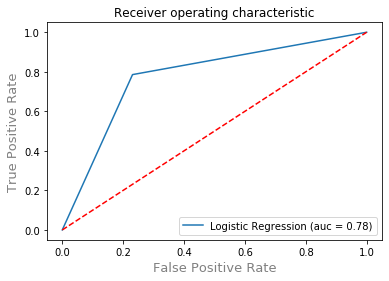

auc 0.7774725274725274


In [15]:
# ocena modelu
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC)
auc = metrics.roc_auc_score(ytest, y_pred_LRC)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

# Including the 'Pclass' variable has compromised model properties!
It is widely known that the first class passengers had a better chance of being saved.
Feature_importances analysis showed that the variable 'Pclass' is of little importance in the classification process.
The addition of this variable to the classification model resulted in a deterioration of the AUC surface.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split  

X = df[[ 'Age', 'Sex', 'Fare','Ticket','Pclass']]
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [17]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(Xtrain, ytrain) 
y_pred_LRC = LR_Grid.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      0.8025
Precision Training data:   0.8553
----------------------------------------------------------------------
Recall Test data:          0.8571
Precision Test data:       0.9
----------------------------------------------------------------------
Confusion Matrix Test data
[[ 9  4]
 [ 6 36]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.90      0.86      0.88        42

    accuracy                           0.82        55
   macro avg       0.75      0.77      0.76        55
weighted avg       0.83      0.82      0.82        55



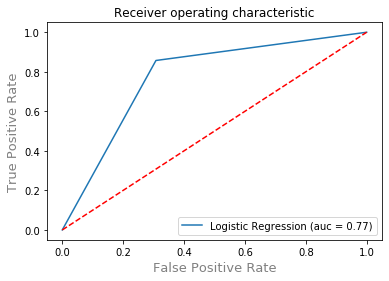

auc 0.7747252747252747


In [18]:
# ocena modelu
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC)
auc = metrics.roc_auc_score(ytest, y_pred_LRC)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)